In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [74]:
data = pd.read_csv('/Users/tientran/Downloads/titanic/titantic/data_set/train.csv')    # Reading a CSV

In [75]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/var/folders/fp/qrb48yf52vq7zn1dmcx_kysh0000gn/T/ipykernel_2970/814811622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu")  # 1.0(positively corr, means that the higher this value gets, the higher the other value gets)


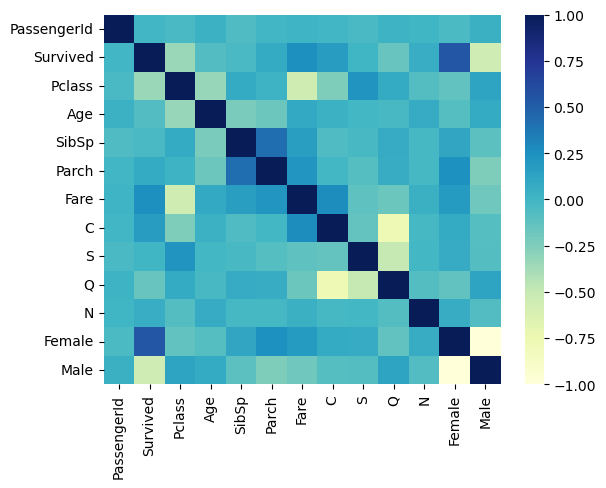

In [116]:
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu")  # 1.0(positively corr, means that the higher this value gets, the higher the other value gets)
# -0.4 (negatively corr, the higher this value gets, the lower the other value gets)
plt.show()
# when you look at the data, the higher the Pclass, the higher the survival, neg corr
# Make sure that you include every single data set, here we don't have gender yet
# You always need to split the data into 2 parts, the trained (which you'll be working on), and the tested (real result)
# You should not look at the trained data, in order to not get biased

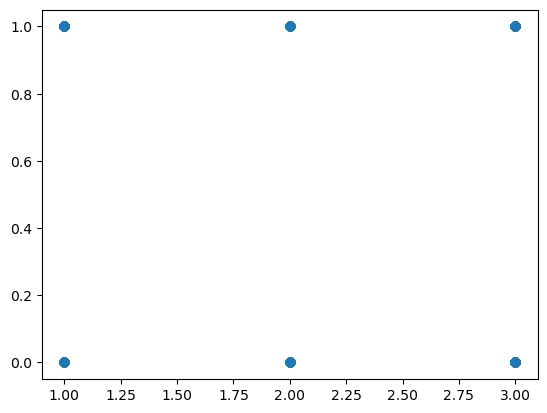

In [118]:
plt.scatter(x='Pclass', y = 'Survived', data=data)              # Making a scattered splot
plt.show()

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2) # This means one split, and 20%

for train_indices, test_indices in split.split(data, data[["Survived", "Pclass", "Sex"]]): 
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]  # What does .loc do? Select rows and cols by labels

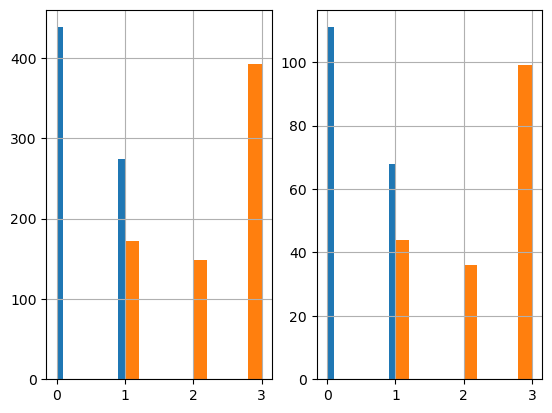

In [79]:
plt.subplot(1,2,1)                    # See if the test set are equal
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

In [80]:
strat_train_set.info()  # To see if we are missing any data here.
# age, cabin, embarked, are missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 208 to 575
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [81]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
"""
BaseEstimator and TransformerMixin, which are used to create custom transformers for data preprocessing. A transformer is a way of transforming data from one format to another, such as scaling or normalizing data.

SimpleImputer is another class that is used for imputing missing values in datasets. Imputing missing values means filling in the gaps with some values, so that the dataset can be used for machine learning algorithms.
"""
class AgeImputer (BaseEstimator, TransformerMixin):
    def fit (self, X, y = None):
        return self
    
    def transform (self, X):
        imputer = SimpleImputer(strategy = "mean") # Take the mean to fill out missing values
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X
        

In [82]:
from sklearn.preprocessing import OneHotEncoder # Make variables from sex, embarked into binary columns

class FeatureEncoder (BaseEstimator, TransformerMixin):
    def fit (self, X, y = None):
        return self
    
    def transform (self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ['C', 'S', 'Q', 'N']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
            
            
            
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X


In [83]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
class FeatureDropper (BaseEstimator, TransformerMixin): # Delete the unnecessary cols
    def fit (self, X, y = None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors = "ignore") # Axis = 1, means that we only drop the columns, not rows. Rows are axis = 0. Because it is 2D objects (rows, cols) in pandas

In [85]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline ([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [86]:
strat_train_set = pipeline.fit_transform(strat_train_set)  # Run the fit_transform on all of these and create a new pipeline

In [87]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 208 to 575
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [88]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis = 1)
Y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [89]:
# Now we need to train the model
# Supervised learning, unsupervised learning, and reinforcement learning
# STUDY MORE ABOUT THESE

# We're using Random Forest Classifier , supervised learning

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10,100,200,500], "max_depth": [None, 5,10], "min_samples_split": [2,3,4]}    # Can I just put any number here??
]
grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [91]:
final_clf = grid_search.best_estimator_


In [92]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [93]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [94]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
735,736,0,3,28.500000,0,0,16.1000,0.0,0.0,1.0,0.0,1.0
87,88,0,3,29.664286,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
217,218,0,2,42.000000,1,0,27.0000,0.0,0.0,1.0,0.0,1.0
468,469,0,3,29.664286,0,0,7.7250,0.0,1.0,0.0,0.0,1.0
733,734,0,2,23.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,1,2,17.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
437,438,1,2,24.000000,2,3,18.7500,0.0,0.0,1.0,1.0,0.0
169,170,0,3,28.000000,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
274,275,1,3,29.664286,0,0,7.7500,0.0,1.0,0.0,1.0,0.0


In [95]:
X_test = strat_test_set.drop(['Survived'], axis = 1)
Y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

In [96]:
final_clf.score(X_data_test, Y_data_test) 

0.8268156424581006

In [97]:
# Re-combine all the data into 1 (train and test), make sure to look at the total of rows to make sure, so that we can train the model and get a better result
final_data = pipeline.fit_transform(data)  
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [98]:
X_final = final_data.drop(['Survived'], axis = 1)    # Why are we doing this
Y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()

In [99]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10,100,200,500], "max_depth": [None, 5,10], "min_samples_split": [2,3,4]}    # Can I just put any number here??
]
grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [100]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=500)

In [101]:
titanic_test_data = pd.read_csv("test.csv")

In [102]:
final_test_data = pipeline.fit_transform(titanic_test_data)       # What is this for
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [103]:
final_test_data.info()    # We can see that line 5 has a null info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [104]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method = "ffill")   # Fill means to take whatever is in the next value and fill it in

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)      # why are we doing this here

In [105]:
predictions = prod_final_clf.predict(X_data_final_test)


In [106]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])       # Take series of the passenger ID and turn it into a data frame  
final_df['Survived'] = predictions # Create a new col "Survived" equals to predictions
final_df.to_csv("predictions.csv", index=False)

In [112]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
